In [1]:
import random, time
import numpy as np
from collections import defaultdict
from graphs import plot_rewards, plot_test_rewards
# PyTorch
import torch as T
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from q_learning import Q_learning_agent
from sarsa_lambda import Sarsa_lambda_agent
from DQN.DQN import DQN
from DQN_Masking.DQN import DQN_Masking
from DQN_Masking.DDQN import DDQN_Masking
from DQN_Masking.PER_DQN import PER_DQN_Masking
from DQN_Masking.PER_DDQN import PER_DDQN_Masking
from ReplayBuffer import ReplayBuffer
import gym
from gym_chess import ChessEnvV1, ChessEnvV2
from gym_chess.envs.chess_v1 import (
    KING_ID,
    QUEEN_ID,
    ROOK_ID,
    BISHOP_ID,
    KNIGHT_ID,
    PAWN_ID,
)

In [2]:
DEFAULT_BOARD = [
    [-3, -5, -4, -2, -1, -4, -5, -3],
    [-6, -6, -6, -6, -6, -6, -6, -6],
    [0] * 8,
    [0] * 8,
    [0] * 8,
    [0] * 8,
    [6, 6, 6, 6, 6, 6, 6, 6],
    [3, 5, 4, 2, 1, 4, 5, 3],
]

PAWN_BOARD = np.array([[0] * 8] * 8, dtype=np.int8)
# PAWN_BOARD[1, 0] = -PAWN_ID
# PAWN_BOARD[1, 1] = -PAWN_ID
PAWN_BOARD[1, 2] = -PAWN_ID
PAWN_BOARD[1, 3] = -PAWN_ID
PAWN_BOARD[1, 4] = -PAWN_ID
PAWN_BOARD[1, 5] = -PAWN_ID
# PAWN_BOARD[1, 6] = -PAWN_ID
# PAWN_BOARD[1, 7] = -PAWN_ID
# PAWN_BOARD[6, 0] = PAWN_ID
# PAWN_BOARD[6, 1] = PAWN_ID
PAWN_BOARD[6, 2] = PAWN_ID
PAWN_BOARD[6, 3] = PAWN_ID
PAWN_BOARD[6, 4] = PAWN_ID
PAWN_BOARD[6, 5] = PAWN_ID
# PAWN_BOARD[6, 6] = PAWN_ID
# PAWN_BOARD[6, 7] = PAWN_ID
# PAWN_BOARD[7, 4] = KING_ID
# PAWN_BOARD[0, 4] = -KING_ID

In [3]:
print("Building environment")
#env = ChessEnvV1(player_color="WHITE", opponent="random", log=True, initial_state = PAWN_BOARD, end = "promotion")
env = ChessEnvV2(player_color="WHITE", opponent="self", log=False, initial_board=PAWN_BOARD, end = "promotion")

Building environment


In [4]:
epoch = 100

lr = 0.02
discount = 0.9
epsilon = 0.15
trace_decay = 0.7

target_update=100
batch_size = 100
memory_size=10000
learn_interval = 10

alpha = 0.2
beta = 0.5
eta = 0.000001

In [5]:
print("Building environment")
env = ChessEnvV2(player_color="WHITE", opponent="self", log=False, initial_board=PAWN_BOARD, end = "promotion")
agent = PER_DDQN_Masking(env, epoch, lr, discount, epsilon, target_update, channels=(28,56,1), layer_dims=[512,1154,1796], kernel_size=3, stride=1, batch_size=batch_size, memory_size=memory_size, learn_interval=learn_interval, alpha=alpha, beta=beta, eta=eta)


Building environment


Model successfully loaded from 'DQN_Masking 4p 2024-04-09_13-51-28, 10000 epochs\model.pth'
Rewards logs have been loaded from 'DQN_Masking 4p 2024-04-09_13-51-28, 10000 epochs\rewards.txt' successfully.
Showing rewards...


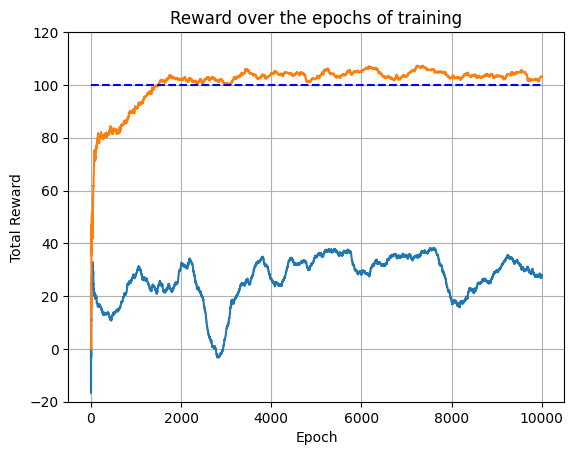

In [6]:
agent.load_training('DQN_Masking 4p 2024-04-09_13-51-28, 10000 epochs')
agent.show_rewards()

Model successfully loaded from 'DDQN_Masking 4p 2024-04-09_17-03-30, 10000 epochs\model.pth'
Rewards logs have been loaded from 'DDQN_Masking 4p 2024-04-09_17-03-30, 10000 epochs\rewards.txt' successfully.
Showing rewards...


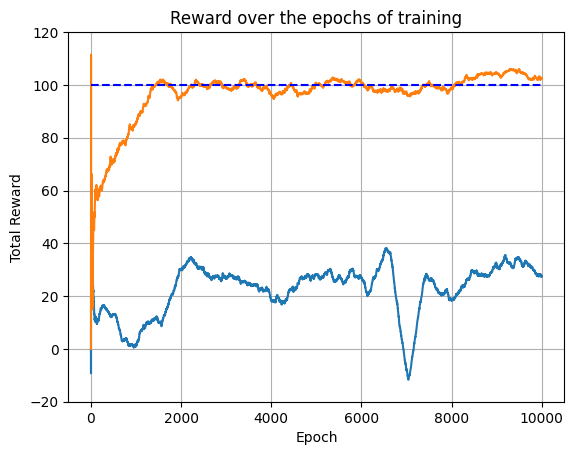

In [7]:
agent.load_training('DDQN_Masking 4p 2024-04-09_17-03-30, 10000 epochs')
agent.show_rewards()

Model successfully loaded from 'PER_DQN_Masking 4p 2024-04-09_01-02-37, 10000 epochs\model.pth'
Rewards logs have been loaded from 'PER_DQN_Masking 4p 2024-04-09_01-02-37, 10000 epochs\rewards.txt' successfully.
Showing rewards...


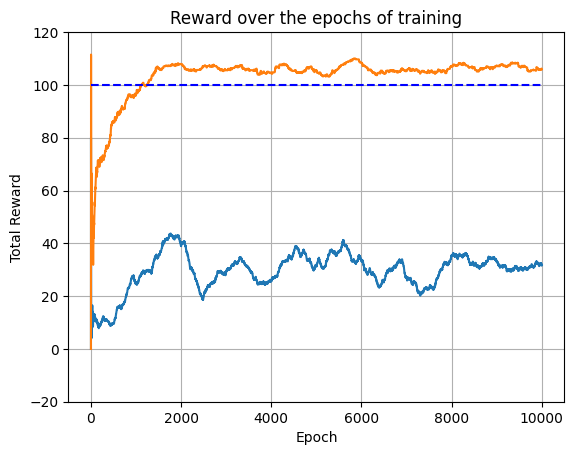

In [8]:
agent.load_training('PER_DQN_Masking 4p 2024-04-09_01-02-37, 10000 epochs')
agent.show_rewards()

Model successfully loaded from 'PER_DDQN_Masking 4p 2024-04-08_18-12-57, 10000 epochs\model.pth'
Rewards logs have been loaded from 'PER_DDQN_Masking 4p 2024-04-08_18-12-57, 10000 epochs\rewards.txt' successfully.
Showing rewards...


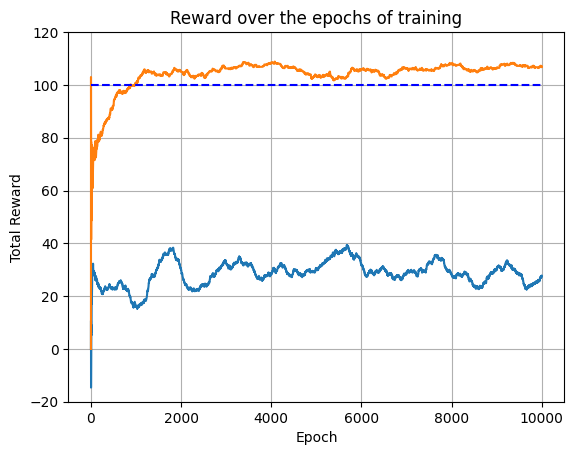

In [9]:
agent.load_training('PER_DDQN_Masking 4p 2024-04-08_18-12-57, 10000 epochs')
agent.show_rewards()